# Finding the best card in a company game of "Happy Families"

The 32 cards used in this notebook were given away at an university in germany. Every card represents a potential employer and contains some stats for the company.

To find the 'best' company a turnament is staged and many randomized card battles are being simulated.

In [1]:
# Import
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Loading the data
df = pd.read_csv('employer_cards.csv')
df.head()

,Name,Branche,Gründung,Umsatz,Mitarbeiter,Akademikeranteil,Hochschulmessen,Maschinenbau,Naturwissenschaften,Elektrotechnik,Informationstechnologie,Bauingenieurwesen,Wirtschaftswissenschaften,Sonstige Studiengänge
0,Schaeffler,Automotive/Industrie,1946,13300,86600,0.0,20,1,0,1,1,0,1,1
1,Heraeus,Technologiekonzern,1851,12900,12500,26.0,8,1,1,1,1,0,1,1
2,Mahle,Automobilindustrie,1920,11500,76000,0.0,25,1,1,1,1,0,1,1
3,univativ,Dienstleistungen,1998,42,1200,95.0,39,1,1,1,1,1,1,1
4,Vector Informatik,Automobil- und Steuerungstechnik,1988,414,1800,0.0,35,0,1,1,1,0,1,1


In [2]:
# Number of games to be played
num_games = 10000

# Dictionary to count the wins of every card
winner_dict = {name:0 for name in df['Name'].values}


def calcWinner(cards_1, cards_2, smaller=True):
    '''
    Input:
    Two lists of values for the battling cards
    Boolean for the winning condition
    
    Output:
    None
    
    Task:
    Computes the winning cards and modifies the 'winner_dict' accordingly
    '''
    # Compute and modify the winning cards
    if smaller:
        for winner in cards_1[cards_1[:,1] < cards_2[:,1]][:,0]:
            winner_dict[winner] += 1
        for winner in cards_2[cards_1[:,1] < cards_1[:,1]][:,0]:
            winner_dict[winner] += 1
    else:
        for winner in cards_1[cards_1[:,1] > cards_2[:,1]][:,0]:
            winner_dict[winner] += 1
        for winner in cards_2[cards_1[:,1] > cards_1[:,1]][:,0]:
            winner_dict[winner] += 1

for _ in range(num_games):
    # Random column to battle with
    value = random.randint(2,6)
    cards = df.values[:,(0,value)]
    # Shuffling the cards to face different opponents every time
    np.random.shuffle(cards)
    cards_1 = cards[:16]
    cards_2 = cards[16:]
    
    # Compute and modify the winning cards
    if value == 2:
        calcWinner(cards_1, cards_2, smaller=True)
    elif value == 3:
        calcWinner(cards_1, cards_2, smaller=False)
    elif value == 4:
        calcWinner(cards_1, cards_2, smaller=False)
    elif value == 5:
        calcWinner(cards_1, cards_2, smaller=False)
    elif value == 6:
        calcWinner(cards_1, cards_2, smaller=False)

In [3]:
# Load the winners dictionary
data = pd.DataFrame(list(winner_dict.items()), columns=['Name', 'Wins'])

# Adding the new data to the original DataFrame
df['Wins'] = data['Wins']

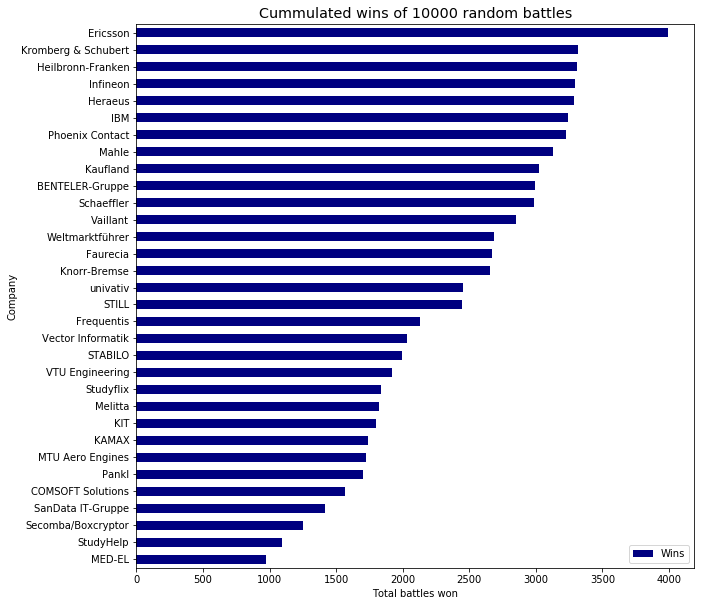

In [4]:
# Plotting the bests cards orderd by their number of won battles
data = data.set_index('Name')
data = data.sort_values(by='Wins', ascending=True)
data.plot(kind='barh', figsize=(10,10), color='navy')
plt.style.use('ggplot')
plt.title('Cummulated wins of {} random battles'.format(num_games))
plt.xlabel('Total battles won')
plt.ylabel('Company')
plt.savefig('build/Best_Cards.pdf',bbox_inches='tight')
plt.show()

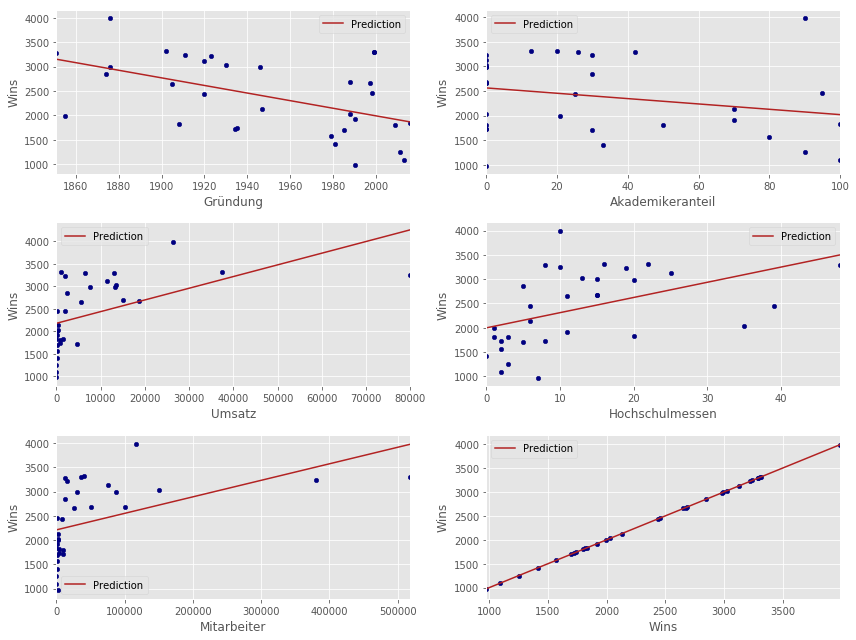

In [5]:
columns = ['Gründung', 'Umsatz', 'Mitarbeiter', 'Akademikeranteil', 'Hochschulmessen', 'Wins']

# Creting the Subplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))
for i, column in enumerate(columns):
    # X-values for the regression
    min_max = np.array([df[column].min(), df[column].max()])
    # Computing the line of best fit
    lr = LinearRegression().fit(df[column].values.reshape(-1, 1), df['Wins'].values.reshape(-1, 1))
    prediction = lr.predict(min_max.reshape(-1, 1))

    # Plotting the line of best fit
    lr_df = pd.DataFrame(list(zip(min_max, prediction.flatten())), columns=['Min_Max', 'Prediction'])
    lr_df.plot.line('Min_Max', 'Prediction', ax=axes[i%3,int(i/3)], color='firebrick')
    
    # Plotting the scattered data
    df.plot.scatter(column, 'Wins', color='navy', ax=axes[i%3,int(i/3)])
plt.tight_layout()
plt.savefig('build/Feature_Correlations.pdf',bbox_inches='tight')
plt.show()

An interessting correlation between 'Akademikeranteil' and 'Wins' occurs. Although a higher percentage in academics in the company is implemented as winning factor it has a small negative correlation.